In [4]:
#importing libraries
#last updated 10/10/2020
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from email.parser import Parser
import os,csv
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aayus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
#importing dataset
data =pd.read_csv('./dataset/enron_dataset_20%.csv')

In [38]:
#dropping features in the dataset which are a result of calculation
data = data.drop(columns=['Cat_1_level_1', 'Cat_1_level_2',
       'Cat_1_weight', 'Cat_2_level_1', 'Cat_2_level_2', 'Cat_2_weight',
       'Cat_3_level_1', 'Cat_3_level_2', 'Cat_3_weight', 'Cat_4_level_1',
       'Cat_4_level_2', 'Cat_4_weight', 'Cat_5_level_1', 'Cat_5_level_2',
       'Cat_5_weight', 'Cat_6_level_1', 'Cat_6_level_2', 'Cat_6_weight',
       'Cat_7_level_1', 'Cat_7_level_2', 'Cat_7_weight', 'Cat_8_level_1',
       'Cat_8_level_2', 'Cat_8_weight', 'Cat_9_level_1', 'Cat_9_level_2',
       'Cat_9_weight', 'Cat_10_level_1', 'Cat_10_level_2',
       'Cat_10_weight', 'Cat_11_level_1', 'Cat_11_level_2',
       'Cat_11_weight', 'Cat_12_level_1', 'Cat_12_level_2',
       'Cat_12_weight'])

In [39]:
data.head()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,labeled
0,403470,<117238.1075846810566.JavaMail.evans@thyme>,2000-12-11 09:22:00,frozenset({'susan.scott@enron.com'}),frozenset({'alicia.perkins@enron.com'}),Re: Travel,Susan M Scott,Alicia Perkins,katyhester@hotmail.com,NaN,\Susan_Scott_Dec2000_June2001_2\Notes Folders\...,SCOTT-S,sscott5.nsf,"Hey Alicia, Katy's email address is katyhester...",scott-s,False
1,130904,<12689165.1075853747639.JavaMail.evans@thyme>,2000-03-09 10:00:00,frozenset({'scott.goodell@enron.com'}),frozenset({'chris.germany@enron.com'}),Re: k#65403,Scott Goodell,Chris Germany,NaN,NaN,\Chris_Germany_Dec2000\Notes Folders\Discussio...,Germany-C,cgerman.nsf,65534 is 149349 in Sitara 65403 was 149346 as ...,germany-c,False
2,217372,<12058190.1075856802090.JavaMail.evans@thyme>,2000-02-04 18:14:00,frozenset({'vince.kaminski@enron.com'}),frozenset({'vkaminski@aol.com'}),El Paso / ENA Deal Completely Terminated Now,Vince J Kaminski,vkaminski@aol.com,NaN,NaN,\Vincent_Kaminski_Jun2001_7\Notes Folders\Disc...,Kaminski-V,vkamins.nsf,---------------------- Forwarded by Vince J Ka...,kaminski-v,False
3,376779,<1251997.1075857131869.JavaMail.evans@thyme>,2000-11-01 12:34:00,frozenset({'benjamin.rogers@enron.com'}),frozenset({'patty.donahue@chase.com'}),Re: FW: winnie_t,Benjamin Rogers,"""Donahue, Patty"" <Patty.Donahue@Chase.com> @ E...",NaN,NaN,\Benjamin_Rogers_Dec2000_1\Notes Folders\All d...,Rogers-B,brogers.nsf,What are you doing sending me this crap! I wan...,rogers-b,False
4,63707,<23661622.1075843051592.JavaMail.evans@thyme>,2000-11-29 15:43:00,frozenset({'jeff.dasovich@enron.com'}),frozenset({'joseph.alamo@enron.com'}),Re: Address Information,Jeff Dasovich,Joseph Alamo,NaN,NaN,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,DASOVICH-J,jdasovic.nsf,Can you get this kind person the info? Thanks ...,dasovich-j,False


In [40]:
data.tail()

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user,labeled
103475,398509,<9956220.1075860573758.JavaMail.evans@thyme>,1999-09-09 17:51:00,frozenset({'richard.sanders@enron.com'}),frozenset({'ferazzi@emrecruiting.com'}),Re: Candidate,Richard B Sanders,ferazzi@emrecruiting.com,NaN,NaN,\Richard_Sanders_Dec2000\Notes Folders\Sent,Sanders-R,rsander.nsf,Yes. Send his resume.,sanders-r,False
103476,438197,<26817012.1075844236728.JavaMail.evans@thyme>,2001-05-03 13:34:00,frozenset({'sarah.novosel@enron.com'}),"frozenset({'james.steffes@enron.com', 'richard...",Memo Regarding Washington Office,Sarah Novosel,"Richard Shapiro, James D Steffes",Linda Robertson,NaN,\Richard_Shapiro_June2001\Notes Folders\Discus...,SHAPIRO-R,rshapiro.nsf,Rick and Jim: As Linda and I discussed with Ri...,shapiro-r,False
103477,302430,<14477836.1075846120303.JavaMail.evans@thyme>,2000-08-21 17:33:00,frozenset({'kay.mann@enron.com'}),frozenset({'martin.penkwitz@enron.com'}),Re: Westinghouse,Kay Mann,Martin W Penkwitz,NaN,NaN,\Kay_Mann_June2001_4\Notes Folders\'sent mail,MANN-K,kmann.nsf,FYI. ---------------------- Forwarded by Kay M...,mann-k,False
103478,296344,<22030900.1075858287215.JavaMail.evans@thyme>,2001-01-17 18:11:00,frozenset({'phillip.love@enron.com'}),frozenset({'victor.guggenheim@enron.com'}),Pages to print for Hunter,Phillip M Love,Victor Guggenheim,NaN,NaN,\Phillip_Love_Jun2001\Notes Folders\Sent,Love-P,plove.nsf,---------------------- Forwarded by Phillip M ...,love-p,False
103479,147417,<26905586.1075840593794.JavaMail.evans@thyme>,2001-04-13 10:43:00,frozenset({'pete.davis@enron.com'}),frozenset({'pete.davis@enron.com'}),Start Date: 4/13/01; HourAhead hour: 11; <COD...,Schedule Crawler<pete.davis@enron.com>,pete.davis@enron.com,"bert.meyers@enron.com, bill.williams.III@enron...",NaN,\mark guzman 6-28-02\Notes Folders\All documents,GUZMAN-M,mark guzman 6-28-02.nsf,Start Date: 4/13/01; HourAhead hour: 11; No an...,guzman-m,False


In [41]:
data.describe()

,Unnamed: 0
count,103480.000000
mean,258428.879928
std,149261.811705
min,6.000000
25%,129517.250000
50%,258514.500000
75%,387474.250000
max,517400.000000


In [42]:
data.columns.values

array(['Unnamed: 0', 'Message-ID', 'Date', 'From', 'To', 'Subject',
       'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin',
       'X-FileName', 'content', 'user', 'labeled'], dtype=object)

In [43]:
data.dtypes

Unnamed: 0     int64
Message-ID    object
Date          object
From          object
To            object
Subject       object
X-From        object
X-To          object
X-cc          object
X-bcc         object
X-Folder      object
X-Origin      object
X-FileName    object
content       object
user          object
labeled         bool
dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103480 entries, 0 to 103479
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  103480 non-null  int64 
 1   Message-ID  103480 non-null  object
 2   Date        103480 non-null  object
 3   From        103480 non-null  object
 4   To          99165 non-null   object
 5   Subject     99656 non-null   object
 6   X-From      103476 non-null  object
 7   X-To        101679 non-null  object
 8   X-cc        25663 non-null   object
 9   X-bcc       39 non-null      object
 10  X-Folder    103476 non-null  object
 11  X-Origin    103476 non-null  object
 12  X-FileName  102624 non-null  object
 13  content     103246 non-null  object
 14  user        103480 non-null  object
 15  labeled     103480 non-null  bool  
dtypes: bool(1), int64(1), object(14)
memory usage: 11.9+ MB


In [45]:
#------------------End of Preprocessing---------------------------#

In [46]:
#Visualisation begins here.
#describe your visualisations here:
#WordCloud - Identifies most used words in the the subject and the content. 
#Bar Graph - It clearly shows that how biased our data is and due to its biasness the model in the future may give us many FALSE NEGATIVE 
# value hence we need to under sample the data or apply another strategy to tackle the issue.

(-0.5, 399.5, 199.5, -0.5)

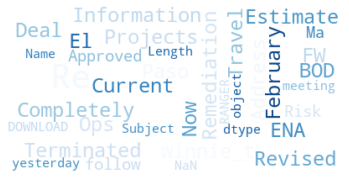

In [47]:
#The Subject head 100
#plt.subplot(2, 2, 1)
wordcloud = WordCloud(background_color="white", scale=1,colormap='Blues', max_font_size=40).generate(str(data['Subject'].head(100)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

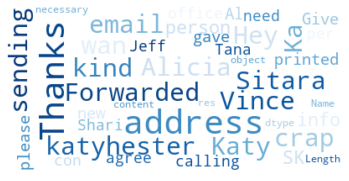

In [48]:
#The Content head 1000
#plt.subplot(2, 2, 2)
wordcloud = WordCloud(background_color="white", scale=1,colormap='Blues', max_font_size=40).generate(str(data['content'].head(1000)))
plt.imshow(wordcloud, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis('off')

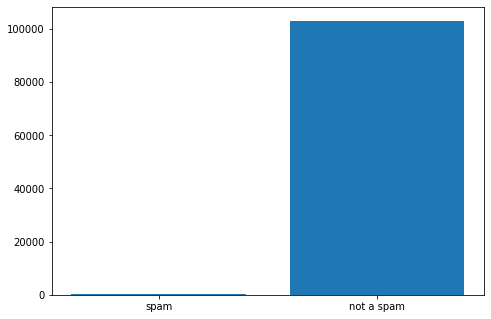

In [49]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['spam', 'not a spam']
countTrue=0;
countFalse=0;
tp=0
for i in data['labeled']:
    tp = tp + 1;
    if i == True:
        countTrue +=1;
    elif i == False:
        countFalse +=1;
students = [countTrue, countFalse]
ax.bar(langs,students)
plt.show()

In [52]:
emails_from_andrew = pd.read_csv('./dataset/andrew_sent.csv')
pd.DataFrame.reset_index(emails_from_andrew)
emails_from_andrew.set_index('To', inplace=True)
emails_from_andrew

,From,Content
To,,
greg.whalley@enron.com,andrew.fastow@enron.com,\r\n\r\n -----original message-----\r\nfrom: \...
jeff.skilling@enron.com,andrew.fastow@enron.com,"jeff:\r\n\r\ni'm sure this is just a ""misunder..."
greg.whalley@enron.com,andrew.fastow@enron.com,\r\n\r\n -----original message-----\r\nfrom: \...


In [53]:
maximum_interaction_sent = []
for row in emails_from_andrew.iterrows():
    maximum_interaction_sent.append(row[0])
maximum_interaction_sent = tuple(maximum_interaction_sent)
counts_sent_to = Counter(maximum_interaction_sent)
print(counts_sent_to.most_common(5))

[('greg.whalley@enron.com', 2), ('jeff.skilling@enron.com', 1)]


In [54]:
emails_to_andrew = pd.read_csv('./dataset/andrew_recieved.csv')
pd.DataFrame.reset_index(emails_to_andrew)
emails_to_andrew.set_index('From', inplace=True)
emails_to_andrew

,To,Content
From,,
rebecca.carter@enron.com,"rick.buy@enron.com, andrew.fastow@enron.com",please provide comments to the attached minute...
joannie.williamson@enron.com,"raymond.bowen@enron.com, london.brown@enron.co...",management committee meeting\r\ndate:\t\tmonda...
paula.rieker@enron.com,"raymond.bowen@enron.com, london.brown@enron.co...",the management committee is invited to join th...
joannie.williamson@enron.com,"k..allen@enron.com, sally.beck@enron.com, tim....",i apologize if there has been any confusion re...
paula.rieker@enron.com,"rick.buy@enron.com, richard.causey@enron.com, ...",ken lay is very interested in providing opport...
...,...,...
bryan.seyfried@enron.com,"greg.whalley@enron.com, kenneth.lay@enron.com,...",john thought you might be interested in the fo...
paula.rieker@enron.com,"mark.koenig@enron.com, greg.whalley@enron.com,...",the location for today's meeting at 4:15 p.m. ...
paula.rieker@enron.com,"mark.koenig@enron.com, greg.whalley@enron.com,...",pls. join a meeting in greg's office today at ...


In [55]:
maximum_interaction_recieved = []
for row in emails_to_andrew.iterrows():
    maximum_interaction_recieved.append(row[0])
maximum_interaction_recieved = tuple(maximum_interaction_recieved)
counts_got_from = Counter(maximum_interaction_recieved)
print(counts_got_from.most_common(10))

[('joannie.williamson@enron.com', 28), ('paula.rieker@enron.com', 12), ('mike.mcconnell@enron.com', 10), ('maureen.mcvicker@enron.com', 8), ('karen.myer@enron.com', 7), ('rosalee.fleming@enron.com', 5), ('gay.mayeux@enron.com', 5), ('rebecca.carter@enron.com', 4), ('l..wells@enron.com', 4), ('billy.dorsey@enron.com', 4)]


In [56]:
emails_from_andrew = pd.read_csv('./dataset/andrew_sent.csv')
pd.DataFrame.reset_index(emails_from_andrew)
emails_from_andrew.set_index('Content', inplace=True)
#emails_from_andrew

In [57]:
content_of_emails_from_Andrew = []
for row in emails_from_andrew.iterrows():
    content_of_emails_from_Andrew.append(row[0])
#content_of_emails_from_Andrew[0]

In [58]:
content_of_emails_from_Andrew_full = " "
content_of_emails_from_Andrew_full = content_of_emails_from_Andrew_full.join(content_of_emails_from_Andrew)

In [59]:
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
emails_data = nltk.word_tokenize(content_of_emails_from_Andrew_full)         #tokenizing content
#emails_data_words = [nltk.word_tokenize(sent) for sent in content_of_emails_from_Andrew_full]
#emails_data = " "
#emails_data = ','.join(str(email_con) for email_con in emails_data_words)
words_only = [l.lower() for l in emails_data if l not in string_punctuation if l not in ignoreChar] #removing unwanted words
filtered_emails_data=[word for word in words_only if word not in stopwords.words('english')] #removing stopwords
wnl = nltk.WordNetLemmatizer()                                         #lemmatizing words
counts=Counter([wnl.lemmatize(data) for data in filtered_emails_data]) #recording the count of words
commn_words=[] 
freq=[]
for a in counts.most_common(30):                                   #printing words
    commn_words.append(a[0])
    freq.append(a[1])
    print(a)

('petrobras', 26)
('transaction', 16)
('--', 15)
('asep', 12)
('meeting', 11)
('november', 10)
('approval', 8)
('letter', 8)
('vagner', 8)
('victor', 8)
('monday', 7)
('ceg', 6)
('would', 6)
('issue', 5)
('soon', 5)
('want', 5)
('company', 5)
('ljm', 5)
('october', 4)
('jeff', 4)
('state', 4)
('agenda', 4)
('required', 4)
('day', 4)
('14', 4)
('u', 4)
('sends', 4)
('governor', 4)
('directive', 4)
('wait', 4)


Most talked about words in these emails are "PETROBRAS" "meeting" "MONDAY" "November".
According to the research it was found out that the Enron Corp. and Petrobras, Brazil's big, government-owned oil and gas business, have formed a partnership in the month of November on a Monday.